# Field-of-view images

Gives an overview on how to access different field-of-view images from the vr2p ExperimentData object.
Can be useful for tracking registration accuracy, seeing cell locations etc.

## Accessing the data.

### Select vr2p file
Select the vr2p zarr file for the animal you want to look at

In [ ]:
%load_ext autoreload
%autoreload 2
from ipyfilechooser import FileChooser
import matplotlib.pyplot as plt
import vr2p
# Create and display a FileChooser widget
fc = FileChooser()
display(fc)

### Create the ExperimentData Object
All the experimental data from an animal can be accessed using the ExperimentData object

In [2]:
data = vr2p.ExperimentData(fc.selected) # You can normally just put the file path here as a text string.

## Images data structure

FOV images are stored under data.images

You can either access images before (original) or after registration (registered)

* **data.images.original:** Images of FOV before registration.
* **data.images.registered:** Registered FOV images.

Access data from different sessions by indexing:

```python
data.images.original[0] # Access imaged from first session
```

Indexing returns a dictionary with three different images:

* **mean_img:** Mean image of the FOV.
* **enhanced_img:** Mean image filtered with a min-max filter.
* **max_img:** Functional maximum image (Filtered on activity).

for example:

```python
data.images.original[0]['mean_img'] # Access mean image from first session
```

Note: Image data may have non uniform aspect ratio.

Currently, we are imaging with a 1x0.5 (width x height) aspect ratio.

### Accessing sessions

Image data is stored as a list of dictionary. Each item in the list is the data from one recording session.

In [6]:
# Get number of recording sessions.
print(f"There is FOV image data for: {len(data.images.original)} sessions")

There is FOV image data for: 26 sessions


### Accessing image data types
Each session has three image types.

In [8]:
print(data.images.original[0].keys())

dict_keys(['mean_img', 'enhanced_img', 'max_img'])


### Example plotting before/after image registration.

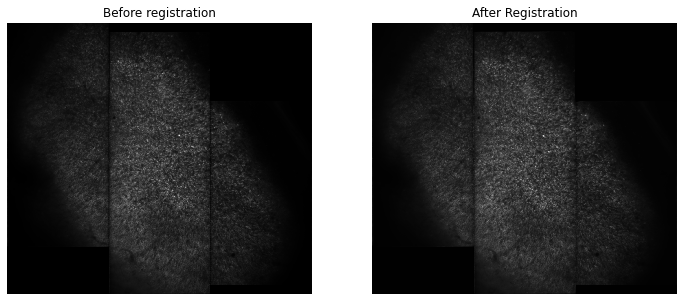

In [15]:
%matplotlib inline
fig, axs = plt.subplots(1,2,figsize=(12,5),sharey=True)

# images to access.
session_ind = 0
img_type = 'mean_img'

# get images.
img_before = data.images.original[session_ind][img_type]
img_after = data.images.registered[session_ind][img_type]

# Plot images.
axs[0].imshow(img_before,interpolation='none',cmap='gray',aspect=1.5) # correct non uniform aspect ratio.
axs[1].imshow(img_after,interpolation='none',cmap='gray',aspect=1.5)
axs[0].axis('off')
axs[1].axis('off')

# formatting
axs[0].set_title(f"Before registration")
axs[1].set_title(f'After Registration')
plt.subplots_adjust(hspace = .5)